In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3    

In [2]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
  
# pre_trained_model.summary()

In [3]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 2048)


In [4]:
train_dir = 'Dataset/train'
test_dir = 'Dataset/test'

In [7]:
from tensorflow.keras.optimizers import RMSprop

x= layers.Flatten()(last_output)

# x= layers.Dense(1024, activation = 'relu')(x)

x= layers.Dropout(0.5)(x)

x= layers.Dense(2 , activation= 'softmax')(x)

model = Model(pre_trained_model.input, x)



In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [9]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [10]:
# model.summary()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     


validation_generator =  test_datagen.flow_from_directory( test_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 200 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_generator),
            epochs = 80,
            validation_steps = len(validation_generator),
            verbose = 2)

Train for 10 steps, validate for 2 steps
Epoch 1/80
10/10 - 77s - loss: 0.0296 - accuracy: 0.9850 - val_loss: 2.3997 - val_accuracy: 0.7632
Epoch 2/80
10/10 - 76s - loss: 0.1030 - accuracy: 0.9750 - val_loss: 6.1867 - val_accuracy: 0.5000
Epoch 3/80
10/10 - 73s - loss: 0.0956 - accuracy: 0.9600 - val_loss: 5.0443 - val_accuracy: 0.5263
Epoch 4/80
10/10 - 75s - loss: 0.1085 - accuracy: 0.9650 - val_loss: 1.8298 - val_accuracy: 0.7632
Epoch 5/80
10/10 - 75s - loss: 0.1859 - accuracy: 0.9600 - val_loss: 4.4586 - val_accuracy: 0.5263
Epoch 6/80
10/10 - 76s - loss: 0.0997 - accuracy: 0.9650 - val_loss: 3.4000 - val_accuracy: 0.5000
Epoch 7/80
10/10 - 75s - loss: 0.1177 - accuracy: 0.9550 - val_loss: 5.4510 - val_accuracy: 0.5263
Epoch 8/80
10/10 - 72s - loss: 0.0972 - accuracy: 0.9600 - val_loss: 4.5194 - val_accuracy: 0.5000
Epoch 9/80
10/10 - 71s - loss: 0.2005 - accuracy: 0.9350 - val_loss: 4.7375 - val_accuracy: 0.5000
Epoch 10/80
10/10 - 71s - loss: 0.2540 - accuracy: 0.9400 - val_loss

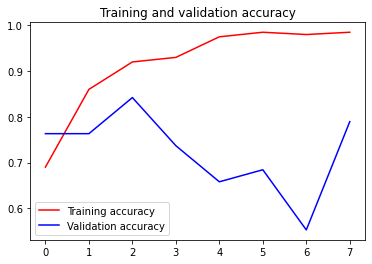

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [14]:
from tensorflow import keras

# from keras.models import load_model
model.save('facefeature_inception.h5')